# Misura dell'Efficienza del Rivelatore 1

### Updated to 13 December 2024 - Andre

Dimensioni rivelatori: ...


Questo notebook contiene la misura dell'efficienza dei tre scintillatori calcolata sfruttando le coincidenze doppie e triple mediante la formula:

$\epsilon_{riv} = \frac{N_{triple}}{N_{doppie}}$
> * I conteggi vengono effettuati ogni 5 minuti.
> * WDT del'onda quadra generata dal discriminatore a 169 per avere $\Delta t$ = 50 ns 
> * Tempo morto [dead time] = 150 ns (impostato a 0)
> * Delay time = 5 ns (per tutti e tre i rivelatori)
> * N.B.: Non si è tenuto conto delle coincidenze accidentali (il conteggio è stato fatto ed è un numero trascurabile rispetto al numero di conteggi singoli)
> * N.B.: Per trovare il valore ottimale di Threshold, aspettiamo di scendere sotto al 90% di efficienza e ci fermiamo (con quel voltaggio)

### Esempio: Efficienza del Primo Rivelatore

Sfruttiamo le coincidenze triple. Le coincidenze doppie sono relative al secondo e al terzo rivelatore: 




$N_{triple} = N_{\mu} \, \epsilon_1 \, \epsilon_2 \, \epsilon_3$,

$N_{doppie} = N_{\mu}\, \epsilon_2 \,\epsilon_3$ $=$ $N_{2,3} $ 
$\Rightarrow$ $\epsilon_1 = \frac{N_{triple}}{N_{2,3}} $

In [92]:
#LIBRERIE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import uproot

#PARAMTERI
DELTA_T = 50 * 10 ** (-9) #s
MIN_TEST = 5 #min
SECONDI_TEST = MIN_TEST * 60 #s

#COSTANTI
FIGSIZE_1_1 = (10, 6)
FIGSIZE_3_1 = (10, 18)
FIGSIZE_3_2 = (18, 12)

FONT = "DejaVu Sans"
FONT_DIM = [12,15,18,21,27]
MARKER_SIZE = 4
LINE_WIDTH = 1.5
GRID_COLOR = 'lightgray'
GRID_ALPHA = 0.8


COLORI_BIN = ["tab:blue", "tab:red"]
COLORI_DUE = ["tab:blue", "tab:orange"]
COLORI_TRE = ["tab:blue", "tab:green", "tab:red"]
COLORI_ARC = ["tab:purple", "tab:blue", "tab:green", "tab:olive", "tab:orange", "tab:red"]
COLORI_ARC_10 = ["maroon", "tab:red","darkorange" ,"darkgoldenrod", "tab:olive", "tab:green", "teal", "tab:blue", "tab:purple", "darkmagenta"]


CARTELLA_IMMAGINI = "Immagini/"
ESPORTA_IMMGAGINI = True
FORMATO_IMMAGINI = ".pdf"
DPI = 300

#FONT (LaTeX)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

### Raccolta Dati

* Voltaggi degli Scintillatori 2 e 3:  $V = 1050 \,V$
* Threshold degli Scintillatori 2 e 3:  $Th = 70 \,mV$


Variamo il voltaggio e la threshold per trovare il punto in cui l'efficienza dello Scintillatore 1 è massima.

In [93]:
# Rivelatore 1 : le doppie sono 2,3
data_1000V = {
'V [V]': np.full(7, 1000),
'Th [mV]' :     [0, 10, 20, 25, 30, 40, 50,],  
'N_singole_1':  [364097, 53436, 27631, 21344, 16802, 11282, 8088,],
'N_singole_2':  [11546, 11375, 11416, 11326, 11485, 11331, 11349,],
'N_singole_3':  [13923, 13667, 13732, 13747, 13805, 13637, 13833,],   
'N_doppie_12' : [7217, 6726, 6788, 6703, 6581, 5959, 4987,],
'N_doppie_13' : [7504, 6956, 6937, 6878, 6812, 6116, 5137,],
'N_doppie_23' : [6008, 5827, 5922, 5874, 5954, 5872, 5924,],   
'N_triple' :    [5975, 5791, 5879, 5804, 5761, 5092, 4216,],
}

# Rivelatore 1 : le doppie sono 2,3
data_1050V = {
'V [V]': np.full(6, 1050),
'Th [mV]' :     [0, 10, 20, 30, 40, 50, ],
'N_singole_1':  [457266, 76381, 42772, 28021, 19269, 14350, ],
'N_singole_2':  [11378, 11330, 11341, 11282, 11294, 11471, ],
'N_singole_3':  [13726, 13653, 13652, 13728, 13751, 13939, ], 
'N_doppie_12' : [7213, 6795, 6738, 6754, 6632, 6520, ],
'N_doppie_13' : [7480, 6877, 6898, 6879, 6733, 6664, ],
'N_doppie_23' : [5950, 5757, 5865, 5869, 5837, 5991, ],
'N_triple' :    [5923, 5717, 5823, 5828, 5711, 5649,],
}

# Rivelatore 1 : le doppie sono 2,3
data_1100V = {
'V [V]': np.full(8, 1100),
'Th [mV]' :     [0, 10, 20, 30, 40, 50, 60, 70, ],
'N_singole_1':  [514293, 103877, 61368, 42377, 31086, 23543, 18388, 14692, ],
'N_singole_2':  [11284, 11395, 11423, 11467, 11349, 11369, 11303, 11277,],
'N_singole_3':  [13660, 13833, 13833, 13817, 13874, 13813, 13595, 13566, ],
'N_doppie_12' : [7149, 6986, 6923, 6945, 6810, 6764, 6652, 6355, ],
'N_doppie_13' : [7398, 7144, 7132, 7067, 7009, 6923, 6753, 6531, ],
'N_doppie_23' : [5875, 5967, 5972, 6021, 5912, 5948, 5881, 5852, ],
'N_triple' :    [5842, 5926, 5949, 5989, 5866, 5872, 5739, 5484],
}

# Rivelatore 1 : le doppie sono 2,3
data_1150V = {
'V [V]': np.full(12, 1150),
'Th [mV]' :     [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, ],
'N_singole_1':  [562235, 139518, 83522, 59718, 45379, 36232, 29114, 23933, 20075, 16864, 14642, 12658],
'N_singole_2':  [11267, 11338, 11286, 11656, 11278, 11306, 11407, 11446, 11547, 11222, 11503, 11234],
'N_singole_3':  [13679, 13700, 13681, 13951, 13548, 13913, 13690, 13887, 13679, 13778, 13761, 13709],  
'N_doppie_12' : [7120, 6997, 6846, 7066, 6772, 6878, 6726, 6867, 6708, 6543, 6432, 5988, ],
'N_doppie_13' : [7329, 7090, 6978, 7199, 6868, 7036, 6834, 7010, 6799, 6740, 6559, 6140, ],
'N_doppie_23' : [5903, 5881, 5843, 6077, 5858, 5981, 5856, 6027, 5866, 5894, 5987, 5760, ],
'N_triple' :    [5873, 5848, 5802, 6050, 5824, 5936, 5807, 5959, 5746, 5708, 5571, 5145],
}

# NO : something bad happened 
data_1200V = {
'V [V]': np.full(9, 1200),
'Th [mV]' :     [0, 10, 30, 50, 70, 100, 120, 160, 170,], # 180, 200, 255, ],
'N_singole_1':  [732709, 424535, 176526, 112542, 86932, 63370, 52648, 36192, 11396,], # 11113, 10961, 13360, ],
'N_singole_2':  [11246, 11141, 11228, 11301, 11312, 11443, 11383, 11086, 11405,], # 11378, 11244, 11352, ],
'N_singole_3':  [13722, 13794, 13422, 13632, 13564, 13635, 13704, 13377, 13728,], # 13686, 13566, 13643, ],
'N_doppie_12' : [7132, 7080, 6932, 6890, 6899, 6976, 6814, 6600, 5849,], # 5654, 5543, 6123, ],
'N_doppie_13' : [7434, 7331, 7148, 7115, 7048, 7087, 6990, 6789, 6050,], # 5940, 5793, 6261, ],
'N_doppie_23' : [5822, 5881, 5838, 5918, 5915, 6019, 5861, 5746, 6036,], # 5894, 5809, 5938, ],
'N_triple' :    [5788, 5842, 5811, 5894, 5882, 5989, 5823, 5713, 5054,], # 4905, 4799, 5281, ],
}

# new : different value for threshold 160 mV
# new : new value with threshold 140 mV
# new : different value for threshold 120 mV
# new : different value for threshold 255 mV
data_1250V = {
'V [V]': np.full(10, 1200),
'Th [mV]' :     [0, 10, 30, 50, 70, 100, 120, 140, 160, 170,], # 180, 200, 255, ],  
'N_singole_1':  [732709, 424535, 176526, 112542, 86932, 63370, 18316, 14350, 12313, 11396,], # 11113, 10961,  5248],
'N_singole_2':  [11246, 11141, 11228, 11301, 11312, 11443, 11397, 11439, 11508, 11405,], # 11378, 11244,  11297],
'N_singole_3':  [13722, 13794, 13422, 13632, 13564, 13635, 13772, 13697, 13707, 13728,], # 13686, 13566,  13646],
'N_doppie_12' : [7132, 7080, 6932, 6890, 6899, 6976, 6645, 6332, 6021, 5849,], #  5654,5543,  3287],
'N_doppie_13' : [7434, 7331, 7148, 7115, 7048, 7087, 6856, 6510, 6262, 6050,], # 5940, 5793,  3485],
'N_doppie_23' : [5822, 5881, 5838, 5918, 5915, 6019, 5984, 5918, 6015, 6036,], # 5894, 5809, 5886],
'N_triple' :    [5788, 5842, 5811, 5894, 5882, 5989, 5799, 5484, 5228, 5054,], # 4905, 4799,  2710],

}

df_1000V = pd.DataFrame(data_1000V)
df_1050V = pd.DataFrame(data_1050V)
df_1100V = pd.DataFrame(data_1100V)
df_1150V = pd.DataFrame(data_1150V)
df_1200V = pd.DataFrame(data_1200V)
df_1250V = pd.DataFrame(data_1250V)

Asse_x = {
    1000: np.array([0, 10, 20,  30,  40, 50]),
    1050: np.array([0, 10, 20,  30,  40, 50]),
    1100: np.array([0, 15, 30,  45,  60, 75]),
    1150: np.array([0, 20, 40,  60,  80, 100]),
    1200: np.array([0, 25, 50,  75, 100, 125, 150, 175]), #225, 255]),
    1250: np.array([0, 25, 50,  75, 100, 125, 150, 175])
}

dataframes =    [df_1000V,  df_1050V,   df_1100V,   df_1150V,   df_1200V,   df_1250V]
voltages =      [1000,      1050,       1100,       1150,       1200,       1250    ]

In [94]:
for df in dataframes:
    # Calculate double coincidences
    N_doppie_acc_12 = (df['N_singole_1'] / SECONDI_TEST) * (df['N_singole_2'] / SECONDI_TEST) * DELTA_T
    N_doppie_acc_13 = (df['N_singole_1'] / SECONDI_TEST) * (df['N_singole_3'] / SECONDI_TEST) * DELTA_T
    N_doppie_acc_23 = (df['N_singole_2'] / SECONDI_TEST) * (df['N_singole_3'] / SECONDI_TEST) * DELTA_T

    # Calculate triple coincidences
    N_triple_acc = (
                    (df['N_singole_1'] / SECONDI_TEST) *
                    (df['N_singole_2'] / SECONDI_TEST) *
                    (df['N_singole_3'] / SECONDI_TEST) *
                    DELTA_T ** 2
    )

    # Calculate errors
    epsilon_1 = df['N_triple'] / df['N_doppie_23']
    sigma_epsilon_1 = np.sqrt(epsilon_1 / df['N_doppie_23'] * (1 - epsilon_1))

    df['N_doppie_acc_12'] = N_doppie_acc_12
    df['N_doppie_acc_13'] = N_doppie_acc_13
    df['N_doppie_acc_23'] = N_doppie_acc_23
    df['N_triple_acc'] = N_triple_acc
    df['epsilon_1'] = epsilon_1
    df['sigma_epsilon_1'] = sigma_epsilon_1

df_1000V   

,V [V],Th [mV],N_singole_1,N_singole_2,N_singole_3,N_doppie_12,N_doppie_13,N_doppie_23,N_triple,N_doppie_acc_12,N_doppie_acc_13,N_doppie_acc_23,N_triple_acc,epsilon_1,sigma_epsilon_1
0,1000,0,364097,11546,13923,7217,7504,6008,5975,0.002335,0.002816,0.000089,5.419481e-09,0.994507,0.000954
1,1000,10,53436,11375,13667,6726,6956,5827,5791,0.000338,0.000406,0.000086,7.691920e-10,0.993822,0.001027
2,1000,20,27631,11416,13732,6788,6937,5922,5879,0.000175,0.000211,0.000087,4.010704e-10,0.992739,0.001103
3,1000,25,21344,11326,13747,6703,6878,5874,5804,0.000134,0.000163,0.000086,3.077064e-10,0.988083,0.001416
4,1000,30,16802,11485,13805,6581,6812,5954,5761,0.000107,0.000129,0.000088,2.466634e-10,0.967585,0.002295
5,1000,40,11282,11331,13637,5959,6116,5872,5092,0.000071,0.000085,0.000086,1.614171e-10,0.867166,0.004429
6,1000,50,8088,11349,13833,4987,5137,5924,4216,0.000051,0.000062,0.000087,1.175686e-10,0.711681,0.005885


In [95]:
# Per rendere il confronto tra efficienze più facili, creo un dataframe le cui colonne saranno solo 
# i valori delle efficienze:
epsilon_data = {}  # Dictionary to store epsilon_1 values for comparison

for idx_df, df in enumerate(dataframes):  # Loop through DataFrames
    epsilon_data[f'df_{voltages[idx_df]}V'] = df['epsilon_1']

# Create a new DataFrame for epsilon_1 values
epsilon_df = pd.DataFrame(epsilon_data)


In [96]:
epsilon_df

# N.B. : Se alcuni valori sono NaN è solo perché non abbiamo preso quei dati
# inoltre questo confronto è poco fair perché efficienze della stessa riga NON
# corrispondono necessariamente a threshold uguali
# è giusto un confronto visivo tra voltaggi (e NON threshold)

,df_1000V,df_1050V,df_1100V,df_1150V,df_1200V,df_1250V
0,0.994507,0.995462,0.994383,0.994918,0.994160,0.994160
1,0.993822,0.993052,0.993129,0.994389,0.993368,0.993368
2,0.992739,0.992839,0.996149,0.992983,0.995375,0.995375
3,0.988083,0.993014,0.994685,0.995557,0.995945,0.995945
4,0.967585,0.978414,0.992219,0.994196,0.994421,0.994421
5,0.867166,0.942914,0.987223,0.992476,0.995016,0.995016
6,0.711681,NaN,0.975854,0.991633,0.993516,0.969084
7,NaN,NaN,0.937116,0.988717,0.994257,0.926664
8,NaN,NaN,NaN,0.979543,0.837309,0.869160
9,NaN,NaN,NaN,0.968442,NaN,0.837309


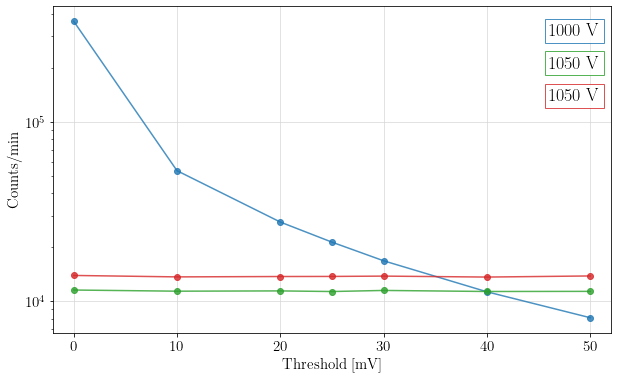

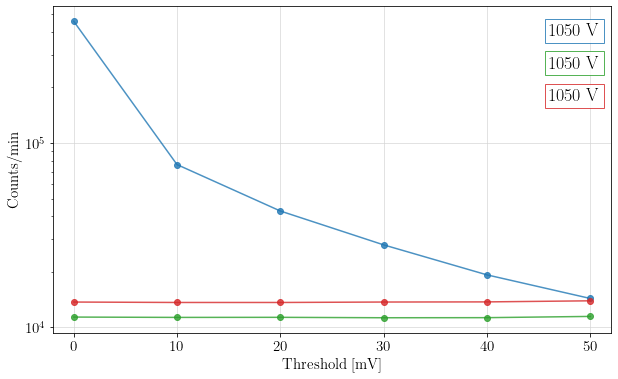

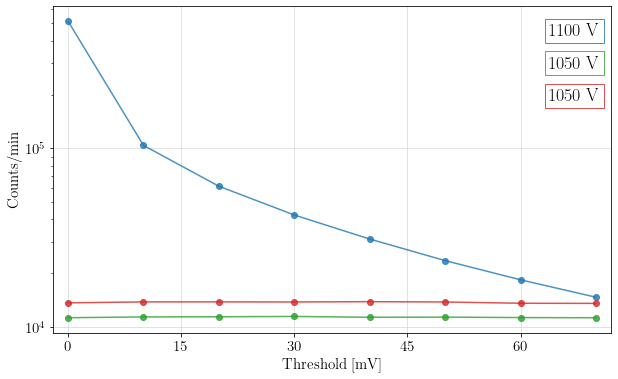

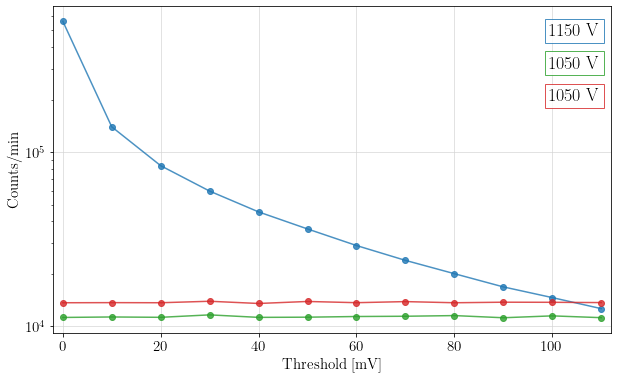

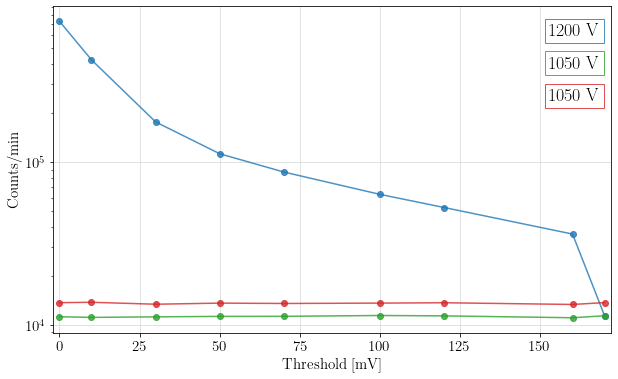

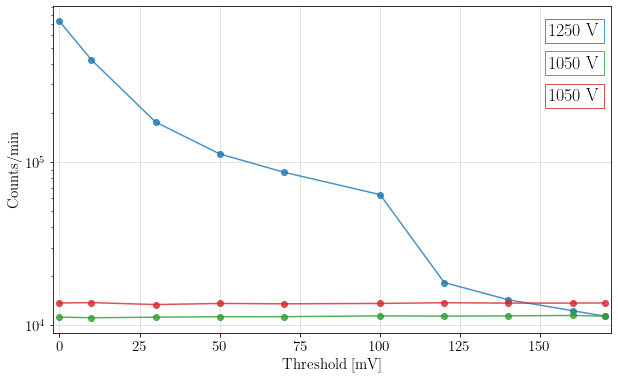

In [97]:
for df, voltage in zip(dataframes, voltages):
    plt.figure(figsize = FIGSIZE_1_1)

    plt.plot(df['Th [mV]'], df['N_singole_1'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[0], alpha = GRID_ALPHA)
    plt.plot(df['Th [mV]'], df['N_singole_2'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[1], alpha = GRID_ALPHA)
    plt.plot(df['Th [mV]'], df['N_singole_3'], linestyle = '-', marker = 'o', 
             linewidth = LINE_WIDTH, color = COLORI_TRE[2], alpha = GRID_ALPHA)

    #plt.title('Counts per Minute vs Threshold Voltage', fontsize = FONT_DIM[1])
    plt.xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
    plt.ylabel('Counts/min', fontsize = FONT_DIM[1])

    plt.xticks(Asse_x[voltage], fontsize = FONT_DIM[1])
    plt.yticks(fontsize = FONT_DIM[1])

    plt.xlim(-2, df['Th [mV]'].max() + 2)

    plt.yscale('log')
    plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)
    
    ax = plt.gca()  # Ottieni l'oggetto Axes corrente
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[0]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.85,  # Coordinate relative (x, y)
            '1050 V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[1]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.75,  # Coordinate relative (x, y)
            '1050 V',  
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[2]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto

    #plt.tight_layout()

    if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_1_plateau_" + f'{voltage}' + "_V" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

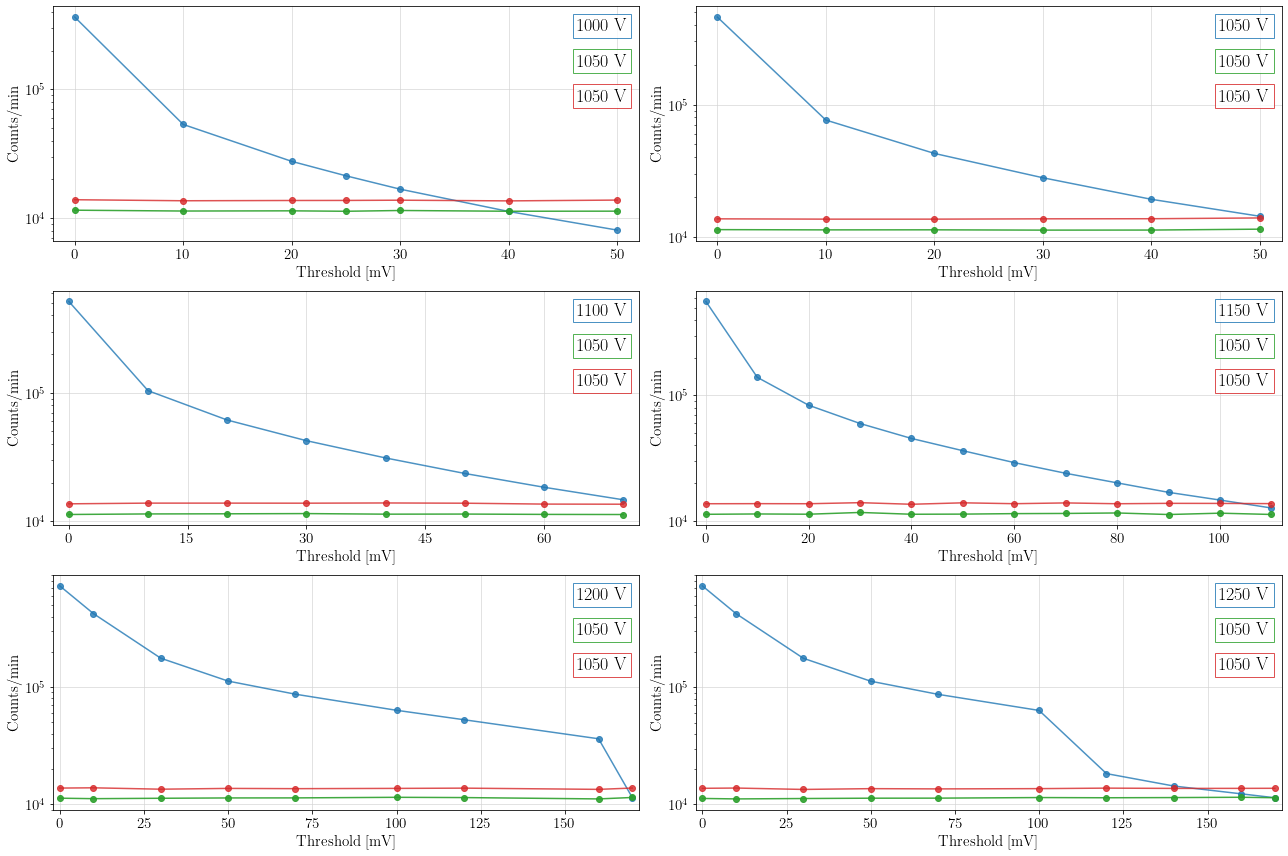

In [98]:
# Create subplots grid (4 rows x 3 columns)
rows, cols = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=FIGSIZE_3_2, sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()

# Loop over dataframes and axes
for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    ax = axes_flat[iPlot]

    # Plot dei dati
    ax.plot(df['Th [mV]'], df['N_singole_1'], linestyle='-', marker='o', 
            linewidth=LINE_WIDTH, color=COLORI_TRE[0], alpha=GRID_ALPHA)
    ax.plot(df['Th [mV]'], df['N_singole_2'], linestyle='-', marker='o', 
            linewidth=LINE_WIDTH, color=COLORI_TRE[1], alpha=GRID_ALPHA + 0.1)
    ax.plot(df['Th [mV]'], df['N_singole_3'], linestyle='-', marker='o', 
            linewidth=LINE_WIDTH, color=COLORI_TRE[2], alpha=GRID_ALPHA)

    # Titolo e etichette degli assi
    #ax.set_title('Counts per Minute vs Threshold Voltage', fontsize=FONT_DIM[1])
    ax.set_xlabel('Threshold [mV]', fontsize=FONT_DIM[1])
    ax.set_ylabel('Counts/min', fontsize=FONT_DIM[1])

    # Configurazione dei tick
    ax.set_xticks(Asse_x[voltage])
    ax.tick_params(axis='x', labelsize=FONT_DIM[1])
    ax.tick_params(axis='y', labelsize=FONT_DIM[1])

    # Limiti degli assi
    ax.set_xlim(-2, df['Th [mV]'].max() + 2)

    # Scala logaritmica sull'asse Y
    ax.set_yscale('log')

    # Griglia
    ax.grid(True, color='lightgray', alpha=GRID_ALPHA)

    # Testo in alto a destra
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[0]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.80,  # Coordinate relative (x, y)
            '1050 V', 
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[1]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto
    ax.text(0.98, 0.65,  # Coordinate relative (x, y)
            '1050 V',  
            fontsize=FONT_DIM[2], 
            bbox=dict(facecolor='white', alpha=GRID_ALPHA, edgecolor=COLORI_TRE[2]),
            transform=ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha='right',  # Allineamento orizzontale a destra
            va='top')    # Allineamento verticale in alto

# Disposizione finale e visualizzazione
plt.tight_layout()

if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_1_plateau_per_tensione" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()


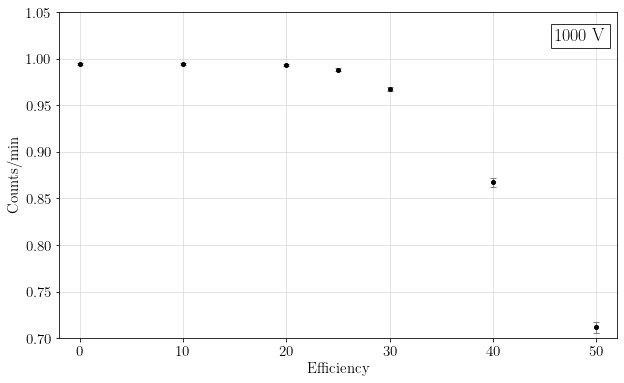

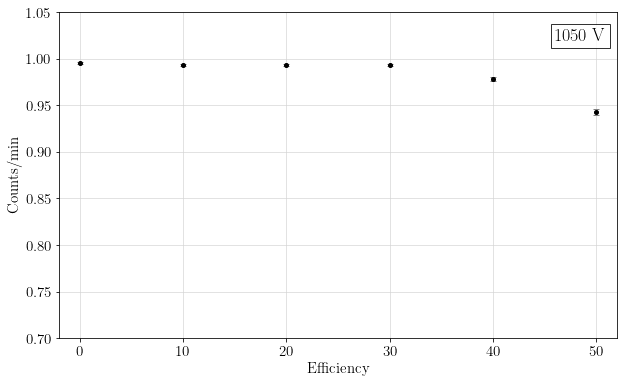

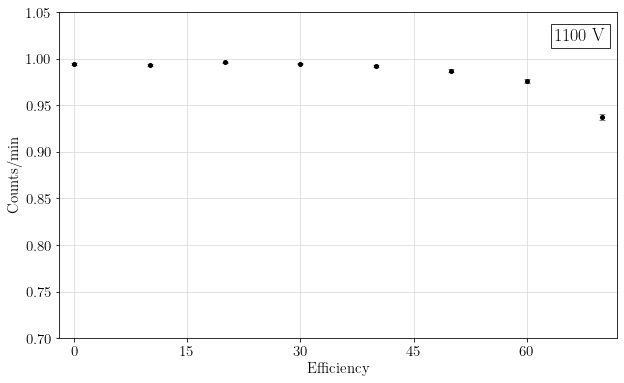

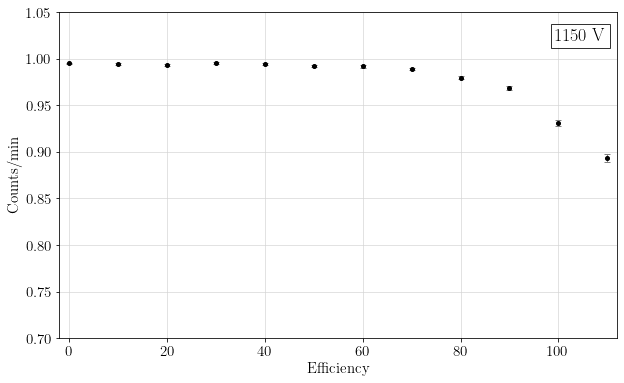

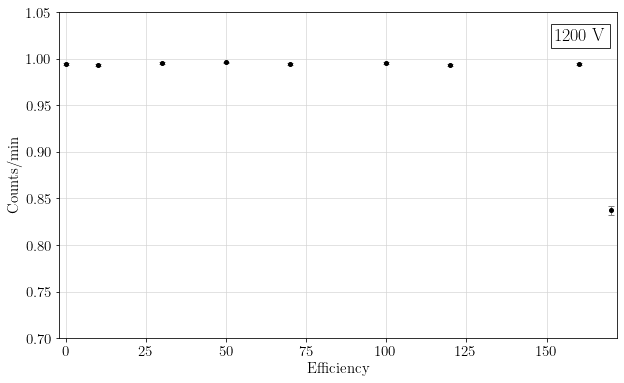

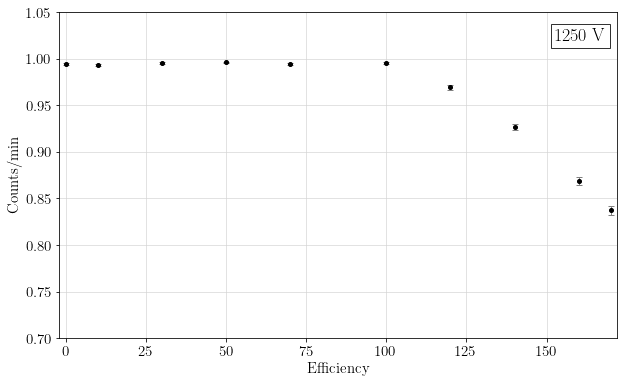

In [99]:
for df, voltage in zip(dataframes, voltages):
    plt.figure(figsize=FIGSIZE_1_1)
    
    # Plot with error bars
    plt.errorbar(
        df['Th [mV]'], df['epsilon_1'], 
        yerr=df['sigma_epsilon_1'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    #plt.title('Efficiency vs Threshold Voltage', fontsize = FONT_DIM[1])
    plt.xlabel('Efficiency', fontsize = FONT_DIM[1])
    plt.ylabel('Counts/min', fontsize = FONT_DIM[1])

    plt.xticks(Asse_x[voltage], fontsize = FONT_DIM[1])
    plt.yticks(fontsize = FONT_DIM[1])

    plt.xlim(-2, df['Th [mV]'].max() + 2)
    plt.ylim(0.7, 1.05)   
    
    plt.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)
    
    ax = plt.gca()  # Ottieni l'oggetto Axes corrente
    ax.text(0.98, 0.95,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize = FONT_DIM[2], 
            bbox = dict(facecolor = 'white', alpha = GRID_ALPHA, edgecolor = 'black'),
            transform = ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha = 'right',  # Allineamento orizzontale a destra
            va = 'top')    # Allineamento verticale in alto

    #plt.tight_layout()

    if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_1_efficienza_" + f'{voltage}' + "_V" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()

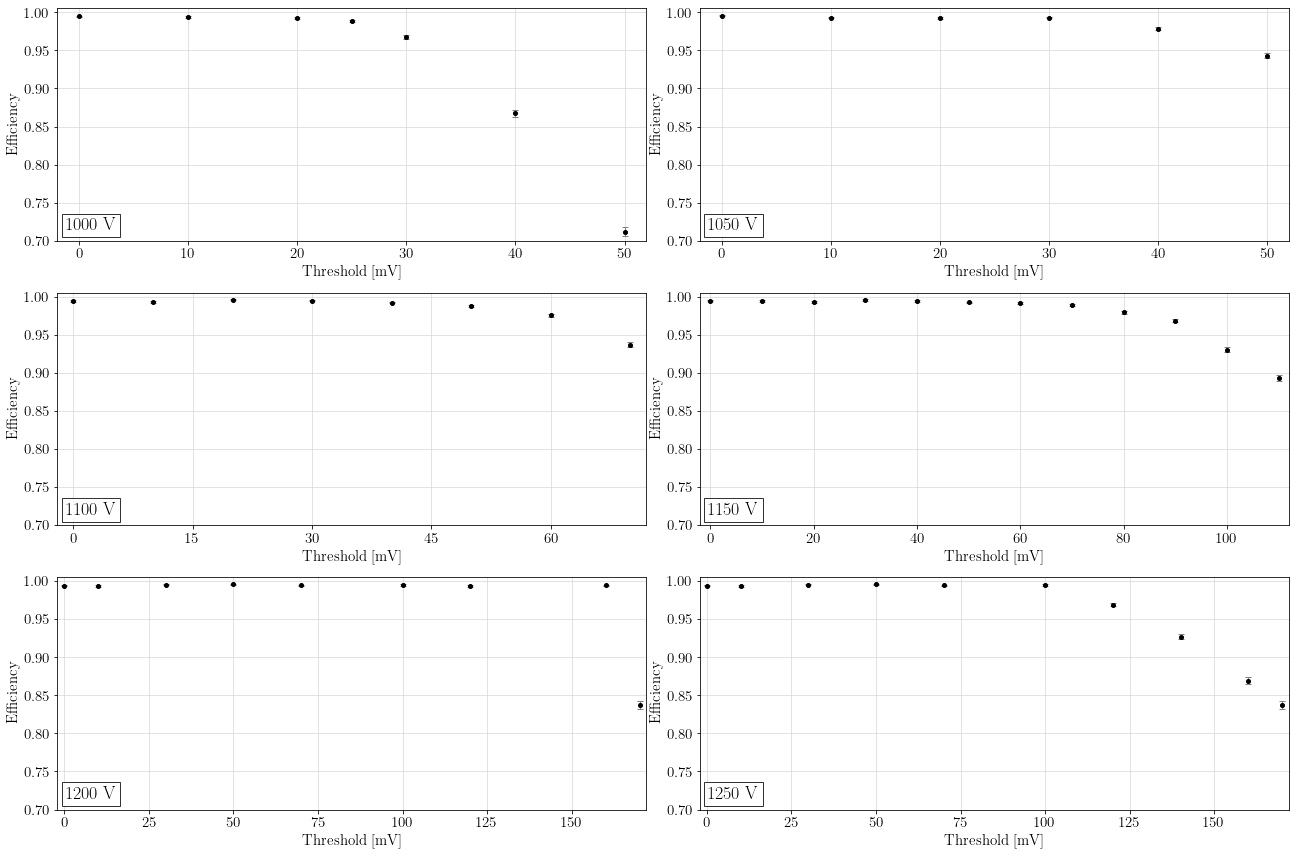

In [100]:
# Create subplots grid (4 rows x 3 columns)
rows, cols = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(18, 12), sharex=False, sharey=False)

# Appiattisci gli assi per iterare facilmente
axes_flat = axes.flatten()

# Loop over dataframes and axes
for iPlot, (df, voltage) in enumerate(zip(dataframes, voltages)):
    ax = axes_flat[iPlot]

    ax.errorbar(
        df['Th [mV]'], df['epsilon_1'], 
        yerr=df['sigma_epsilon_1'],  # Error bar values
        fmt='o', markersize=4, linewidth=0, color='black',  # Marker and line settings
        ecolor='gray', elinewidth=1, capsize=3  # Error bar style
    )
    
    #ax.set_title('Counts per Minute vs Threshold Voltage', fontsize = FONT_DIM[1])
    ax.set_xlabel('Threshold [mV]', fontsize = FONT_DIM[1])
    ax.set_ylabel('Efficiency', fontsize = FONT_DIM[1])

    ax.set_xticks(Asse_x[voltage])
    ax.tick_params(axis='x', labelsize=FONT_DIM[1])
    ax.tick_params(axis='y', labelsize=FONT_DIM[1])

    ax.set_xlim(-2, df['Th [mV]'].max() + 2)
    ax.set_ylim(0.70, 1.005)   
    
    ax.grid(True, color = 'lightgray',  alpha = GRID_ALPHA)

    ax.text(0.10, 0.10,  # Coordinate relative (x, y)
            f'{voltage} V', 
            fontsize = FONT_DIM[2], 
            bbox = dict(facecolor = 'white', alpha = GRID_ALPHA, edgecolor = 'black'),
            transform = ax.transAxes,  # Usa ax.transAxes per le coordinate relative
            ha = 'right',  # Allineamento orizzontale a destra
            va = 'top')    # Allineamento verticale in alto

# Disposizione finale e visualizzazione
plt.tight_layout()

if ESPORTA_IMMGAGINI:
        plt.savefig(CARTELLA_IMMAGINI + "2_1_efficienza_per_tensione" + FORMATO_IMMAGINI, bbox_inches = "tight", dpi=DPI)

plt.show()
